In [7]:
import numpy as np
import xml
import matplotlib.pyplot as plt
points = "8.216041 38.6137 18.88516 -18.05325 38.6137 18.88516 8.216041 38.6137 -12.37988 2.782208 38.6137 -12.37988 -43.43998 38.6137 -12.37988 -43.43998 38.6137 41.40468 -11.77235 38.6137 41.40468 -11.77235 38.6137 81.18934 31.24837 38.6137 81.18934 31.24837 38.6137 41.40468 8.216041 38.6137 41.40468 8.216041 38.6137 24.71702 -18.05325 38.6137 24.71702"
points = points.split()
points = np.array(list(map(float, points))).\
    reshape(len(points)//3, 3)

idx = "1 0 2 0 3 2 4 3 5 4 6 5 7 6 8 7 9 8 10 9 11 10 11 12 12 1"
idx = idx.split()
idx = np.array(list(map(int, idx))).reshape(len(idx)//2, 2)

xs =0.0254 * points[idx, 0].T
zs =0.0254* points[idx, 2].T

def collide(x, z, vx, vz, ignore = -1):
    np.seterr(divide="ignore")
    vx = -vx
    vz = -vz
    trans_xs = xs - x
    trans_zs = zs - z
    x1 = trans_xs[0]
    x2 = trans_xs[1]
    z1 = trans_zs[0]
    z2 = trans_zs[1]
    
    denom = ((x1 - x2) * vz - (z1 - z2) * vx)
    
    t = ((-x2 * vz - -z2 * vx)) / denom
    a = ((x1 - x2) * -z2  - (z1 - z2) * - x2) / denom
    #print (t)
    #print(a)
    
    a [np.logical_not (np.logical_and(t > 0.001, np.logical_and(t < 1, a > 0)))] = 99
    if ignore != -1:
        a[ignore] = 99
    return np.argmin(a), np.min(a)

def reflect(vx, vz, n):
    #maths
    nz = xs[1][n] - xs[0][n]
    nx = -zs[1][n] + zs[0][n]
    
    mul = 1.8 * (nx * vx + nz * vz) / (nx * nx + nz * nz)
    
    return vx - mul * nx, vz - mul * nz

slow = .01
timestep = .01
def path(x,z, vx, vz):
    
    while vx * vx + vz * vz > slow * slow:
        n, tiem = collide(x, z, vx, vz)
        if tiem < timestep:
            timeleft = timestep
            while tiem < timeleft:
                x += vx * tiem
                z += vz * tiem
                vx, vz = reflect(vx, vz, n)
                n, tiem = collide(x, z, vx, vz, n)
                
            x += vx * (timeleft)
            z += vz * (timeleft)
        else:
            x += vx * timestep
            z += vz * timestep
            
        l = np.sqrt(vx * vx + vz * vz)
        vx -= slow * vx/l
        vz -= slow * vz/l
        
        yield x, z

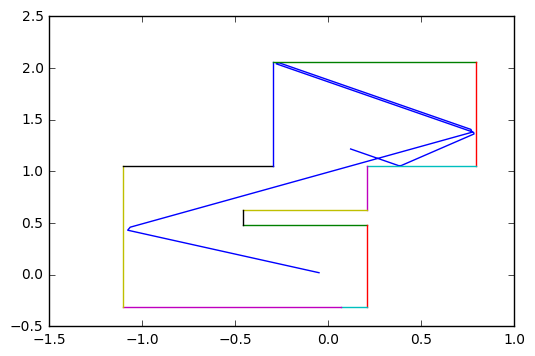

In [9]:
patsh= np.array(list(path(0, 0, -5, 2.0)))
plt.plot(patsh[:, 0], patsh[:, 1])
plt.plot(xs, zs)
plt.show()

In [16]:

for i in range(i):
    pass
i

5

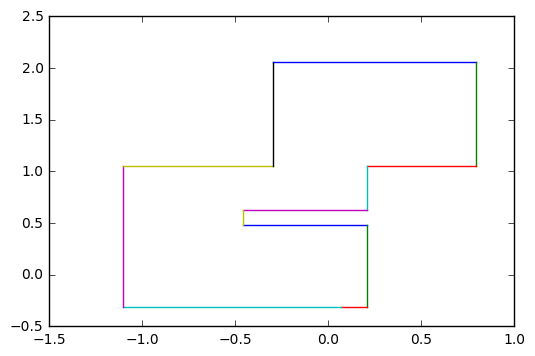

In [15]:
plt.plot(xs, zs)
plt.show()

In [165]:

    
    
n, t  = collide(0, 0, 1, 1)

reflect(1, 1, n)

(-0.80000000000000004, 1.0)

In [166]:
for _ in range(1000):
    collide(0, 0, .714, .714)

In [17]:
i=path(0, 0, -5, 2.0)

In [19]:
next(i)

(-0.05, 0.02)